## 개요
Pandas 기능을 활용하여 공간데이터에서 원하는 속성에 해당하는 데이터만 추출해봅시다.

---

## 사용할 패키지 준비

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

---

## 사용할 데이터 준비
앞서 사용한 행정동 데이터를 사용합니다.

In [2]:
shp_path = 'https://github.com/vuski/admdongkor/raw/master/ver20220701/HangJeongDong_ver20220701.geojson'
dong_gdf = gpd.read_file(shp_path)  
dong_gdf.head()

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
0,1,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구,11010530,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,2,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구,11010540,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ..."
2,3,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구,11010550,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ..."
3,4,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구,11010560,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ..."
4,5,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구,11010570,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ..."


### 위 데이터의 adm_cd에서 앞의 5자리만 뽑아서 gu_cd라는 새로운 항목(컬럼)에 넣으려면 어떻게 할까요?    
객체명['새로운 항목명'] = 객체명['항목명'].str.slice(start=0, stop=자리수)

In [4]:
dong_gdf['gu_cd'] = dong_gdf['adm_cd'].***.******(start=*, stop=*)
dong_gdf.head()

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry,gu_cd
0,1,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구,11010530,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ...",11010
1,2,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구,11010540,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ...",11010
2,3,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구,11010550,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ...",11010
3,4,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구,11010560,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ...",11010
4,5,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구,11010570,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ...",11010


### 전국 행정동에서 sidonm에  '광역시'가 포함된 데이터만 추출하려면?

In [5]:
dong_gdf2 = dong_gdf[ dong_gdf['sidonm'].***.********('광역시')  ]
dong_gdf2.info()
dong_gdf2.tail()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 737 entries, 424 to 3507
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  737 non-null    int64   
 1   adm_nm    737 non-null    object  
 2   adm_cd    737 non-null    object  
 3   adm_cd2   737 non-null    object  
 4   sgg       737 non-null    object  
 5   sido      737 non-null    object  
 6   sidonm    737 non-null    object  
 7   sggnm     737 non-null    object  
 8   adm_cd8   737 non-null    object  
 9   geometry  737 non-null    geometry
 10  gu_cd     737 non-null    object  
dtypes: geometry(1), int64(1), object(9)
memory usage: 69.1+ KB


,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry,gu_cd
3489,1071,대전광역시 유성구 상대동,2504070,3020052700,30200,30,대전광역시,유성구,25040700,"MULTIPOLYGON (((127.32476 36.34676, 127.32635 ...",25040
3496,740,대구광역시 달서구 월성1동,2207077,2729060100,27290,27,대구광역시,달서구,22070770,"MULTIPOLYGON (((128.52310 35.81607, 128.52174 ...",22070
3497,742,대구광역시 달서구 진천동,2207078,2729061500,27290,27,대구광역시,달서구,22070780,"MULTIPOLYGON (((128.51348 35.80994, 128.51661 ...",22070
3498,742,대구광역시 달서구 유천동,2207079,2729061700,27290,27,대구광역시,달서구,22070790,"MULTIPOLYGON (((128.52056 35.81505, 128.52049 ...",22070
3507,1059,대전광역시 서구 도안동,2503076,3017059300,30170,30,대전광역시,서구,25030512,"MULTIPOLYGON (((127.36120 36.30454, 127.35829 ...",25030


### sggnm이 '군'으로 끝나는 데이터만 추출하려면?

In [7]:
dong_gdf3 = dong_gdf[ dong_gdf['sggnm'].str.********('군') ]  
dong_gdf3.info()
dong_gdf3.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 823 entries, 619 to 3478
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  823 non-null    int64   
 1   adm_nm    823 non-null    object  
 2   adm_cd    823 non-null    object  
 3   adm_cd2   823 non-null    object  
 4   sgg       823 non-null    object  
 5   sido      823 non-null    object  
 6   sidonm    823 non-null    object  
 7   sggnm     823 non-null    object  
 8   adm_cd8   823 non-null    object  
 9   geometry  823 non-null    geometry
 10  gu_cd     823 non-null    object  
dtypes: geometry(1), int64(1), object(9)
memory usage: 77.2+ KB


,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry,gu_cd
619,620,부산광역시 기장군 기장읍,2131011,2671025000,26710,26,부산광역시,기장군,21510110,"MULTIPOLYGON (((129.25291 35.25225, 129.25336 ...",21310
620,621,부산광역시 기장군 장안읍,2131012,2671025300,26710,26,부산광역시,기장군,21510120,"MULTIPOLYGON (((129.20297 35.38787, 129.20315 ...",21310
621,622,부산광역시 기장군 정관읍,2131013,2671025600,26710,26,부산광역시,기장군,21510130,"MULTIPOLYGON (((129.23007 35.31972, 129.23009 ...",21310
622,623,부산광역시 기장군 일광읍,2131014,2671025900,26710,26,부산광역시,기장군,21510111,"MULTIPOLYGON (((129.23007 35.31972, 129.22948 ...",21310
623,624,부산광역시 기장군 철마면,2131033,2671033000,26710,26,부산광역시,기장군,21510330,"MULTIPOLYGON (((129.18028 35.30521, 129.17959 ...",21310


### dong_gdf3과 반대(시 또는 구)되는 데이터를 추출하려면?

In [9]:
dong_gdf4 = dong_gdf[ ~(dong_gdf['sggnm'].str.********('군')) ]  

<AxesSubplot: >

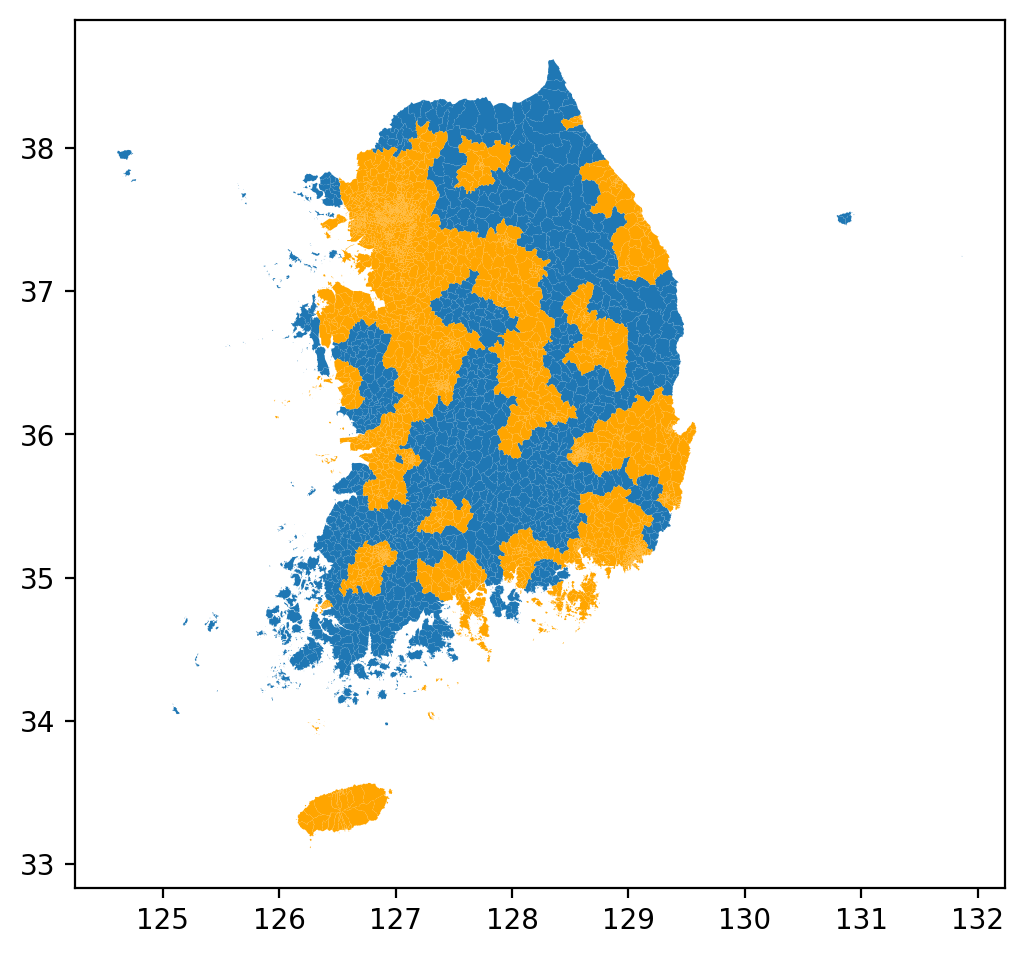

In [10]:
ax1 = dong_gdf3.plot(figsize=(6,6))
dong_gdf4.plot(facecolor='orange', ax=ax1)

### 비교 연산자  
 "==" 값이 같은 경우  
 "!=" 값이 다른 경우   
 "< , <="  값이 작다. 값이 작거나 같다   
 "> , >="  값이 크다. 값이 크거나 같다   

---

### 도형(geometry)의 면적이 일정값 이상인 것만 추출하려면?    

In [24]:
dong_gdf5 = dong_gdf[ dong_gdf.geometry.area > 0.03  ]
dong_gdf5

C:\Users\Gaia3D\AppData\Local\Temp\ipykernel_6772\4242589373.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dong_gdf5 = dong_gdf[ dong_gdf.geometry.area > 0.03  ]


,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry,gu_cd
1767,1791,강원도 홍천군 내면,3231039,4272039000,42720,42,강원도,홍천군,32510390,"MULTIPOLYGON (((128.56690 37.87567, 128.56823 ...",32310
1792,1816,강원도 평창군 진부면,3234036,4276036000,42760,42,강원도,평창군,32540360,"MULTIPOLYGON (((128.59891 37.77411, 128.59763 ...",32340
1810,1834,강원도 화천군 화천읍,3237011,4279025000,42790,42,강원도,화천군,32570110,"MULTIPOLYGON (((127.81280 38.32529, 127.83978 ...",32370
1820,1844,강원도 인제군 인제읍,3239011,4281025000,42810,42,강원도,인제군,32590110,"MULTIPOLYGON (((128.40424 38.09582, 128.40634 ...",32390
1822,1846,강원도 인제군 북면,3239032,4281032000,42810,42,강원도,인제군,32590320,"MULTIPOLYGON (((128.41761 38.25436, 128.41963 ...",32390
3058,3086,경상북도 울진군 금강송면,3742039,4793039000,47930,47,경상북도,울진군,37620390,"MULTIPOLYGON (((129.23806 37.03882, 129.23764 ...",37420


<AxesSubplot: >

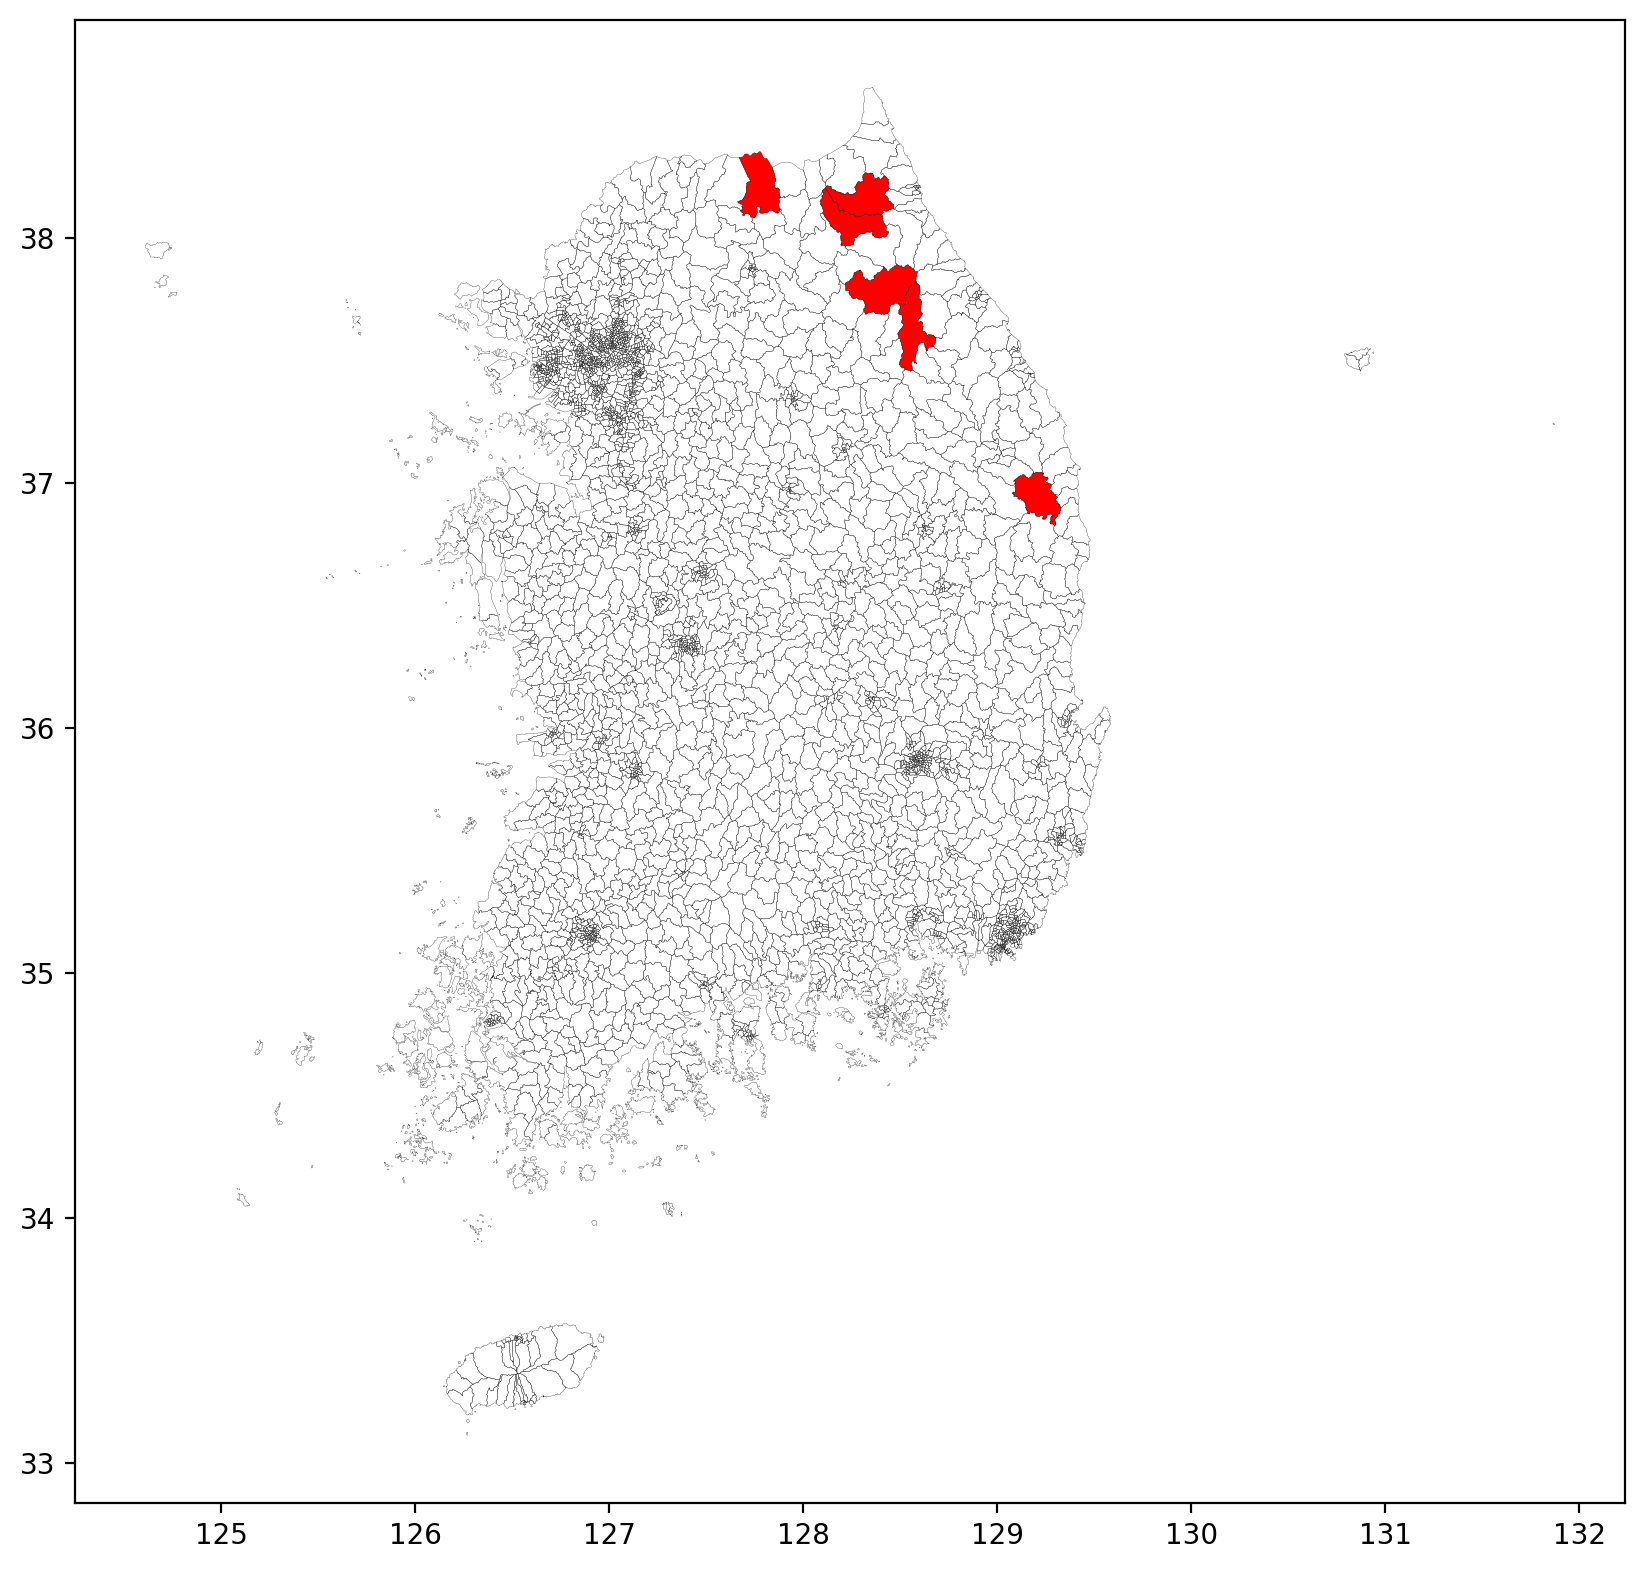

In [33]:
ax1 = dong_gdf.plot(figsize=(10,10), zorder=100, facecolor='none', linewidth=0.1)
dong_gdf5.plot(facecolor='red', ax=ax1)

### 위 데이터는 위도, 경도 좌표체계여서 제곱미터 등 일반적으로 알기 쉬운 면적 단위가 아닙니다.   
### 평면직각좌표계, 특히 대한민국 TM 좌표계로 좌표변환도 할 수 있을까요? 

### 수고 많으셨습니다!!! 